In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


[-0.15813163]


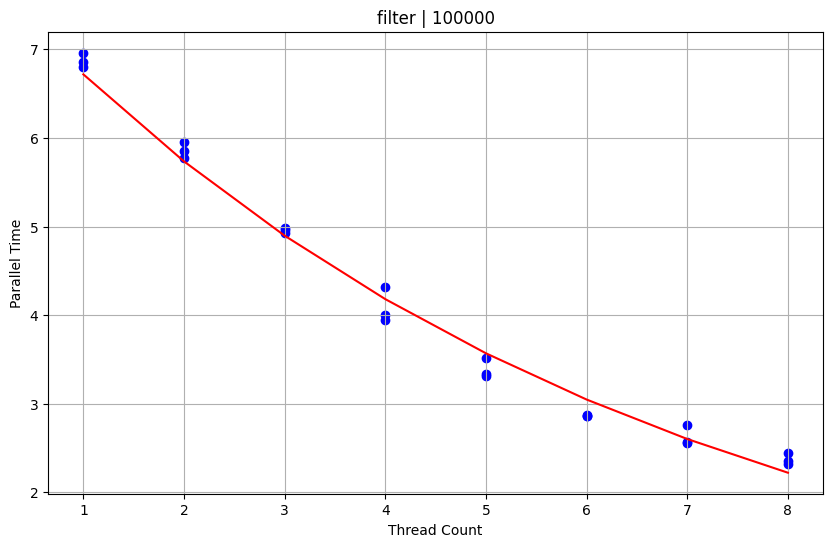

[-0.19760864]


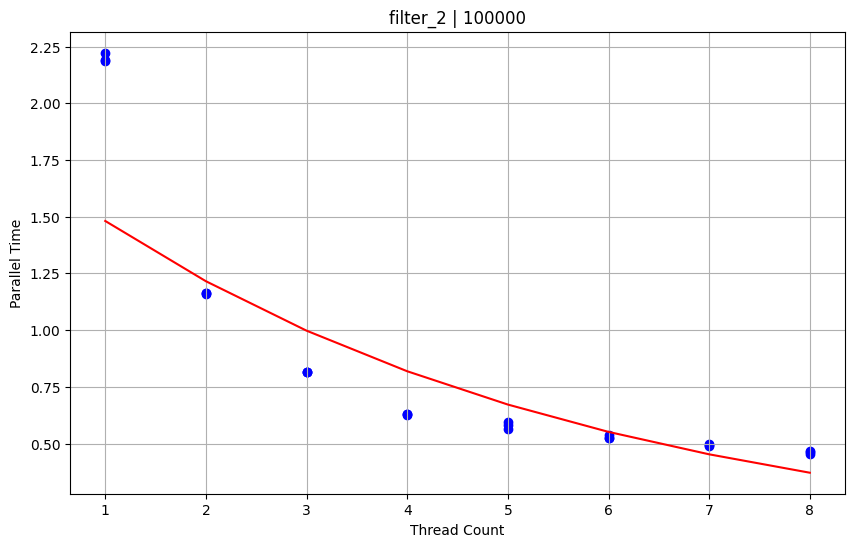

[-0.20645149]


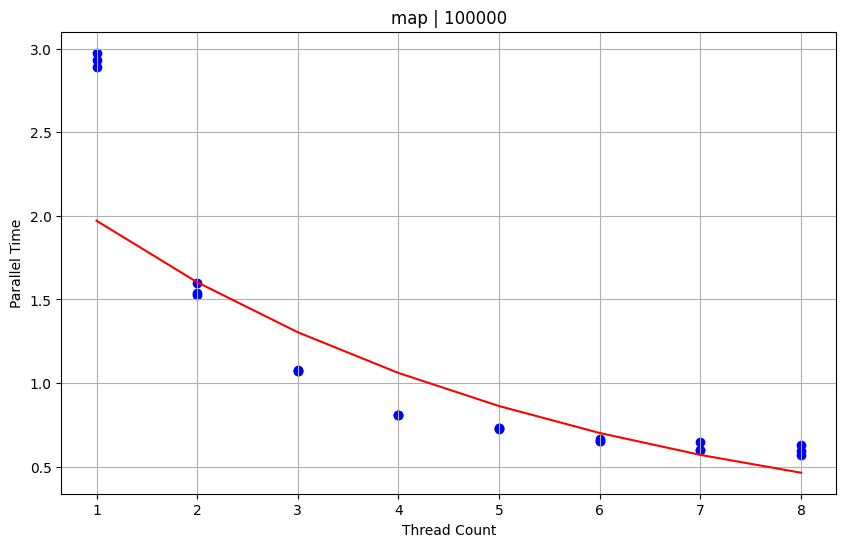

[-0.20842695]


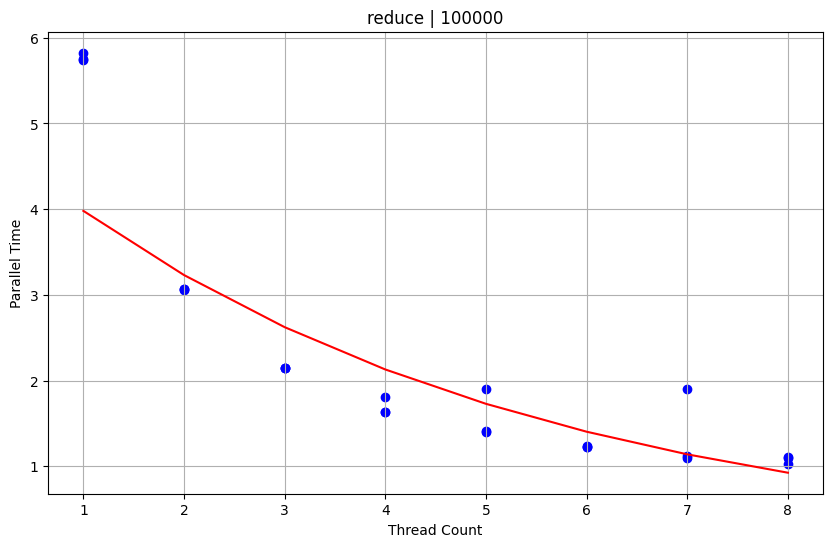

In [2]:
# files = ['reduce', 'map', 'filter']
files = ['filter', 'filter_2', 'map', 'reduce']

for file in files:
    df = pd.read_csv(f"Worker Threads - NodeJS/Data/{file}_data.csv")
    i = df['Array Size'][0]

    # Prepare data
    # We'll group by Thread Count to get average Parallel Time per thread
    grouped = df.groupby('Thread Count')['Parallel Time'].mean().reset_index()
    grouped['Natural Log Time'] = np.log(grouped['Parallel Time'])

    model = LinearRegression()
    model.fit(grouped[['Thread Count']], grouped['Natural Log Time'])
    X_pred = grouped[['Thread Count']]
    ln_pred = model.predict(X_pred)

    # Convert predictions back to original scale: Parallel Time = exp(predicted ln(time))
    parallel_time_pred = np.exp(ln_pred)

    print(model.coef_)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Thread Count'], df['Parallel Time'], color='blue')
    plt.plot(grouped['Thread Count'], parallel_time_pred, color='red', label='Regression Fit (exp model)')

    # Add labels and title
    plt.xlabel('Thread Count')
    plt.ylabel('Parallel Time')
    plt.title(f"{file} | {i}")
    plt.grid(True)

    # Show the plot
    plt.show()
    